## Assignment 9

In this assignment, pretrained neural networks trained on IMAGENET are used.  
The goal is to correctly identify the breed of a pictured dog.  
A dog is considered to be identified correctly if its breed is amongst the top5 predictions of the classifier.

Tutorials followed:  
[OpenCV](https://www.tutorialkart.com/opencv/python/)

In [57]:
# !pip install opencv-python
# !pip install tensorflow

In [1]:
import numpy as np 
import ast
from PIL import Image
import tensorflow as tf 
import matplotlib.pyplot as plt
import glob
import cv2

In [ ]:
# bread the labels of imagenet (source: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)
with open('imagenet_labels.txt') as f:
    labels = ''.join([line.rstrip('\n') for line in f])
labels_mapping = ast.literal_eval(labels)

In [21]:
# get the pretrained models
res = tf.keras.applications.resnet50.ResNet50()
incres = tf.keras.applications.inception_resnet_v2.InceptionResNetV2()
nas = tf.keras.applications.NASNetLarge()

In [ ]:
def top5(y_pred):
    return np.argsort(y_pred[0])[-1:-6:-1]

In [22]:
images = [cv2.imread(file) for file in glob.iglob('**/*.jpg', recursive=True)]

In [62]:
im = images[6]
im_resized_scaled = cv2.resize(im, (224, 224))/255

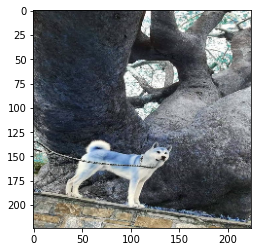

In [63]:
plt.imshow(im_resized_scaled)

In [64]:
im_res = im_resized_scaled[np.newaxis, ...]

y_pred = res.predict(im_res)
[labels_mapping[x] for x in top5(y_pred)]

['nematode, nematode worm, roundworm',
 'cleaver, meat cleaver, chopper',
 'oboe, hautboy, hautbois',
 'ballpoint, ballpoint pen, ballpen, Biro',
 'matchstick']

ResNet has the tendency to classify every good boy as a worm :/

In [65]:
im_resized_scaled = cv2.resize(im, (299, 299))/255
im_res = im_resized_scaled[np.newaxis, ...]

y_pred = incres.predict(im_res)
[labels_mapping[x] for x in top5(y_pred)]

['Norwegian elkhound, elkhound',
 'Siberian husky',
 'Eskimo dog, husky',
 'malamute, malemute, Alaskan malamute',
 'dogsled, dog sled, dog sleigh']

In [66]:
im_resized_scaled = cv2.resize(im, (331, 331))/255
im_res = im_resized_scaled[np.newaxis, ...]

y_pred = nas.predict(im_res)
[labels_mapping[x] for x in top5(y_pred)]

['Norwegian elkhound, elkhound',
 'Siberian husky',
 'Eskimo dog, husky',
 'malamute, malemute, Alaskan malamute',
 'pug, pug-dog']